# Predicting Business Quality from advert content

### *Francisco Casanueva*




# Table of contents:

- Introduction:
    - Context
    - Success criteria
    - Risks and limitations
    - File Index
    - Methodology <br><br>
- Analysis:
    1. Data Recolection
    2. Data Analysis:<br>
        2.1 Cleaning<br>
        2.2 Analysis<br>
        2.3 General Conclusions
    3. Modeling<br>
        3.1 Baseline calculation<br>
        3.2 Preprocessing<br>
        3.3 Model Tuning
            A. Logistic Regression
            B. Random Forest
            C. SVM
            D. K-Nearest Neighbors
            E. PCA (reduction and recalculation of KNN)
    4. Evaluation of the results

## Context

Online reviewing is becoming a key factor in business marketing positioning. The latest statistics and trends show that 90% of consumers read online reviews and 88% of them trust the online reviews as much as personal recommendations. In other words, more people read reviews as part of their pre-purchase research before buying a product or service.

http://www.business2community.com/infographics/impact-online-reviews-customers-buying-decisions-infographic-01280945#7OO3bxJCHCXD5GSE.97

![title](./blanqui.png)

Business nowadays need to be aware of what will be the key factors on determining the reviews obtained by consumer and this is the point of application of this proyect. Trying to model the key factors that determine the quality of your reviews based on your online possitioning.

User experience and the service in the restaurant are the most important factors in determining the final rating. However in this analysis we will to try to predict whether without any business interaction, just based on the quality of the advert, we can predict the rating and what would be the factors that influence the most.

![title](./negi.png)


## Success Criteria

Success in the exercise will be based on the accuracy of the predictions of the number of stars.

** Baseline:**
The baseline based in the number of the most common category (4 stars) would be 48.33%. Prediction scores will aim to better this result.

## Risks ans Limitations

The methodology used in this study will uncover correlations. Futher analysis is needed if we want the study to detect causal effects. The causes of the final review take into account many more variables than the advert content as for example the final experience of the clients in the restaurant.

However applying this same methodology could a plataform for online restaurant reservations or online food delivery would yes, in this case bring more insightful results. Trying to predict with this same models whether a client will finally make the reservation of an online delivery service would be the right place of implementation of this methodology.

## Methodology

The anlysis will be based in four steps:

1. Data Recolection
2. Data Analysis
3. Modeling
4. Visualization of the results

## File Index

This is the main notebook of the capstone project. It holds the main code and modeling, nevertheless in the same folder as this notebook there are adittional files whith key features for the development of the project and it's final insights. This files will be call and use in the structure of this document however here we strat giving a brief summary of what each one of them contains:

-[Business_Quality_Review.ipynb](./Business_Quality_Review.ipynb) main notebook, EDA and Modelling<br\>
-[Yelp API.ipynb](./Yelp_API.ipynb) Script with the connection to Yelp API obtaining of the data and cleaning of the results. It also gets the URL images of each of the adverts exporting them in the file: Ad_image.csv<br/>
-[Ad_image.csv](./Ad_image.csv) Csv file holding the url link to each of the adverts in the database<br\>
-[Yelp_results.csv](./Yelp_results.csv) Csv file holding the clean database results from the Yelp_API.ipynb script<br\>
-[EBAY_API.ipynb](./EBAY_API.ipnb) Script with the connection to EBAY API obtaining of the data and cleaning of the results. (potential future aplication)<br/>
-[GoogleCloud_API.ipynb](./GoogleCloud_API.ipynb) Script with the connection to the google cloud vision API and the extraction of the characteristics of the Ad_image.csv into Ad_image_properties.csv.<br/>
-[Ad_image_properties.csv](./Ad_image_properties.csv) Csv file holding the property database of all the pictures in the yelp call<br\>

### 1. Data Recolection

The methodology used in any data origin that allows us to work with any data that has:

A) A target of quality to predict (stars)<br/>
B) Structured information (description, location, price, etc)<br/>
C) Unstructured information (Optional)(pictures, user reviews, etc)<br/>

In the example develop in this project we will be using restaurant information from the Yelp API. In the shared folder there is also a Ebay extraction from the API that could be included in further analysis.

**Yelp Data Extraction**

Read the code in: [Yelp API.ipynb](./Yelp_API.ipynb)

This file develops the interaction with the Yelp API in other to get the final dataset. This process includes:

1. Oauth2 token autentification
2. HTTP request
3. Collection of the JSON response into a DataFrame
4. Cleaning of the response and structuration of the variables for modeling.

The final result of this script is the dataframe exposed below:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm 
import numpy as np
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
yelp = pd.read_csv("./Yelp_results.csv")

In [3]:
yelp.shape

(3000, 14)

In [4]:
yelp.head(2)

,name,price,review_count,alias,Phone1,city,country,state,address1,zip_code,latitude,longitude,image_url,rating
0,American Bar,3.0,44,cocktailbars,1,London,GB,XGL,The Savoy Hotel,WC2R 0EU,51.509767,-0.119833,https://s3-media1.fl.yelpcdn.com/bphoto/SKAdDh...,4.5
1,Burger & Lobster,2.0,228,seafood,1,London,GB,XGL,36 Dean Street,W1D 4PS,51.513549,-0.132232,https://s3-media2.fl.yelpcdn.com/bphoto/DLmidv...,4.0


Alternatively, as said, this process could be make with other data sources. The Ebay API interaction that brings a similar dataset is also included in the project folder.

**Unstructured information: Image recognition**

Using Google Cloud Vision API and based on the images provided by the Yelp API we are able structure new data that could enrich our analysis, in particular:
- Labels: Google Cloud recognition uses image recognition algorithms to extract labels based on elements of the picture.
- Colors: Fundamental colors that appear on the picture.

The code with this results can be seen in the python notebook [GoogleCloud_API.ipynb](./GoogleCloud_API.ipynb). Where fundamentally:
1. The connection to the google API is made with the google.cloud library.
2. Using the API methods we extract labels and color properties.
3. Cleaning and structuring of the data response obtained


In [5]:
image_properties = pd.read_csv('./image_properties.csv')

In [6]:
image_properties.head(2)

,image_url,Labels,Red,Green,Blue,TOP Pixel_prop,TOP Red,TOP Green,TOP Blue
0,https://s3-media1.fl.yelpcdn.com/bphoto/SKAdDh...,"[u'table', u'drink', u'lighting', u'shape', u'...",35.6374040320594,30.2374670840874,26.4855640232638,0.29133823514,66.0,60.0,58.0
1,https://s3-media2.fl.yelpcdn.com/bphoto/DLmidv...,"[u'dish', u'food', u'meal', u'dinner', u'resta...",58.731070078878204,42.5260667130156,24.0795881971628,0.203647211194,146.0,114.0,68.0


In [7]:
image_properties.drop(['image_url'], axis=1, inplace=True)

And we add this data to the previous frame structure.

In [8]:
yelp = pd.concat([yelp,image_properties], axis = 1)

Image labels row was a list in the original framework. As it was saved in a csv file it lost it's list properties. In order to get them back we run a strip, replace and split function in the column.

In [9]:
yelp.Labels = yelp.Labels.apply(lambda x: x.replace("u'", "").replace("'", "").strip('[]').split(','))

In [10]:
yelp['Image atributes'] = yelp.Labels.apply(lambda x: len(x))

**Unstructured information: Reviews NLP**

*Further analysis would look into the unstructured information obtained from reviews using nlp in order to extract new insight*

## Final Dataset

The final dataset frame is set and will be formed by the next variables:

- name: Business name
- price: 1-5 based on yelp criteria being 5 very expensive and 1 very cheap.
- review_count: number of users reviews
- alias: type of business
- phone: whether it have a contact phone available or not
- country: country of location
- state: state of location
- address1: street and number of location
- zip_code: zipe code of location
- latitude: latitude of location
- longitude: longitude of location
- image_url: image representation of the location
- rating: 1-5 mean rating of the restaurant, based on 0.5 increases in grades
- Labels: labels extracted by Google Vision API of the images
- Red: percentage of red color in the 40% mos common color pixels
- Green: percentage of green color in the 40% mos common color pixels
- Blue: percentage of blue color in the 40% mos common color pixels
- TOP Pixel_prop: pixel proportion of the most common color
- TOP Red: Red proportion in the most common color
- TOP Green: Green proportion in the most common color
- TOP Blue: Blue proportion in the most common color
- Image atributes: Number of levels in a picture

In [11]:
yelp.head(3).T

,0,1,2
name,American Bar,Burger & Lobster,Quilon Restaurant
price,3,2,3
review_count,44,228,103
alias,cocktailbars,seafood,indpak
Phone1,1,1,1
city,London,London,London
country,GB,GB,GB
state,XGL,XGL,XGL
address1,The Savoy Hotel,36 Dean Street,41 Buckingham Gate
zip_code,WC2R 0EU,W1D 4PS,SW1E 6AF


# 2. Data Analysis

- A. Cleaning
- B. Analysis
- C. General Conclusions

## 2.1 Cleaning

In [12]:
yelp.dtypes

name                object
price              float64
review_count         int64
alias               object
Phone1               int64
city                object
country             object
state               object
address1            object
zip_code            object
latitude           float64
longitude          float64
image_url           object
rating             float64
Labels              object
Red                 object
Green               object
Blue                object
TOP Pixel_prop      object
TOP Red             object
TOP Green           object
TOP Blue            object
Image atributes      int64
dtype: object

Looking at the data types the first thing we realize is that picture information are not floats. This issue arises as those rows with unknown values hold the text 'no picture'. Given that they are only 8 rows the best approach in this case would be just droping them.

In [13]:
yelp[yelp['Blue'] == 'no picture']

,name,price,review_count,alias,Phone1,city,country,state,address1,zip_code,...,rating,Labels,Red,Green,Blue,TOP Pixel_prop,TOP Red,TOP Green,TOP Blue,Image atributes
486,Bravas Tapas,2.0,31,spanish,1,London,GB,XGL,St Katharine Docks,E1W 1AT,...,4.0,"[food, meal, dish, dessert, baking, sense...",no picture,no picture,no picture,no picture,no picture,no picture,no picture,10
522,Kodama,2.0,23,tea,1,Paris,FR,75,30 rue Tiquetonne,75002,...,5.0,[],no picture,no picture,no picture,no picture,no picture,no picture,no picture,1
732,Les Catacombes de Paris,NaN,233,localflavor,1,Paris,FR,75,1 avenue du Colonel Henri Rol-Tanguy,75014,...,4.0,"[thermae, ancient history, ruins, arch, wa...",no picture,no picture,no picture,no picture,no picture,no picture,no picture,8
1828,Misticanza,4.0,14,italian,1,Rome,IT,RM,Via Sicilia 47,00187,...,4.5,"[property, floristry, christmas decoration, ...",no picture,no picture,no picture,no picture,no picture,no picture,no picture,10
1838,La Gensola,3.0,32,roman,1,Rome,IT,RM,Piazza della Gensola 15,00153,...,4.0,"[restaurant, lighting, interior design, des...",no picture,no picture,no picture,no picture,no picture,no picture,no picture,6
2027,Dublin Design Night,NaN,40,yelpevents,0,Dublin,IE,D,NaN,2,...,4.5,"[flower, flora, plant, season, leaf, autu...",no picture,no picture,no picture,no picture,no picture,no picture,no picture,8
2819,Hop & Grape,2.0,7,musicvenues,1,Manchester,GB,XGM,Steve Biko Building,M13 9PR,...,4.5,[Error in detect_labels],no picture,no picture,no picture,no picture,no picture,no picture,no picture,1
2994,G-A-Y Manchester,1.0,17,gaybars,1,Manchester,GB,XGM,Canal Street,M1 3WB,...,3.0,[],no picture,no picture,no picture,no picture,no picture,no picture,no picture,1


We drop the 8  restaurants that had no picture

In [14]:
yelp.drop(yelp[yelp['Blue'] == 'no picture'].index, axis=0,inplace=True)

In [15]:
yelp[yelp['Blue'] == 'no picture']

,name,price,review_count,alias,Phone1,city,country,state,address1,zip_code,...,rating,Labels,Red,Green,Blue,TOP Pixel_prop,TOP Red,TOP Green,TOP Blue,Image atributes


In [16]:
for i in ['Red', 'Green', 'Blue', 'TOP Pixel_prop', 'TOP Red', 'TOP Green', 'TOP Blue']:
    yelp[i]= yelp[i].astype(float)

In [17]:
yelp.dtypes

name                object
price              float64
review_count         int64
alias               object
Phone1               int64
city                object
country             object
state               object
address1            object
zip_code            object
latitude           float64
longitude          float64
image_url           object
rating             float64
Labels              object
Red                float64
Green              float64
Blue               float64
TOP Pixel_prop     float64
TOP Red            float64
TOP Green          float64
TOP Blue           float64
Image atributes      int64
dtype: object

## 2.2 Data analysis

In [18]:
yelp.describe()

,price,review_count,Phone1,latitude,longitude,rating,Red,Green,Blue,TOP Pixel_prop,TOP Red,TOP Green,TOP Blue,Image atributes
count,2823.000000,2992.000000,2992.000000,2990.000000,2990.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000
mean,2.088204,47.262366,0.940174,48.246370,0.414420,4.182988,45.606891,37.453522,30.720275,0.183349,116.913770,97.929144,82.217580,7.088570
std,0.750865,55.909097,0.237204,5.260616,6.032366,0.363664,24.636517,24.143120,23.883401,0.124204,81.630217,79.360746,76.727342,2.804897
min,1.000000,2.000000,0.000000,40.397869,-6.315550,3.000000,1.852632,1.852632,1.057227,0.007850,2.000000,1.000000,0.000000,1.000000
25%,2.000000,17.000000,1.000000,41.898450,-3.701579,4.000000,26.937163,19.075672,12.601538,0.096596,28.000000,20.000000,18.000000,5.000000
50%,2.000000,31.000000,1.000000,48.892470,-1.205951,4.000000,41.569947,32.163501,24.055048,0.151249,107.000000,75.000000,49.000000,8.000000
75%,2.000000,56.000000,1.000000,53.343195,2.345445,4.500000,60.549658,51.487970,42.629801,0.235289,200.000000,183.000000,152.000000,10.000000
max,4.000000,856.000000,1.000000,53.494480,12.576897,5.000000,195.958347,195.958347,195.958347,0.926316,254.000000,253.000000,253.000000,10.000000


## Target Analysis:

In [19]:
yelp.rating.value_counts()

4.0    1447
4.5    1135
3.5     264
5.0     129
3.0      17
Name: rating, dtype: int64

In [20]:
yelp.rating.mean()

4.1829879679144382

We see that the mean rating is 4.18 and most marks are distributed between 4 and 4.5

In [21]:
sum((yelp['rating'] == 4) | (yelp['rating'] == 4.5))/float(yelp.shape[0])

0.86296791443850263

In particular 4 and 4.5 marks represent the 86.29%. This raises the idea that probably for the classiffication problem it might make more sense to make it binary between falling above or below 4. 

This will solve problems of class imbalance seen in the 5 stars and 3 stars categories.

**Baseline calculation:**

In [22]:
len(yelp['rating'])

2992

In [23]:
sum(yelp['rating'] == 4)

1447

In [24]:
float(sum(yelp['rating'] == 4))/len(yelp['rating'])

0.48362299465240643

The baseline of the study would be a 48.3%

**Rating fequency distribution**

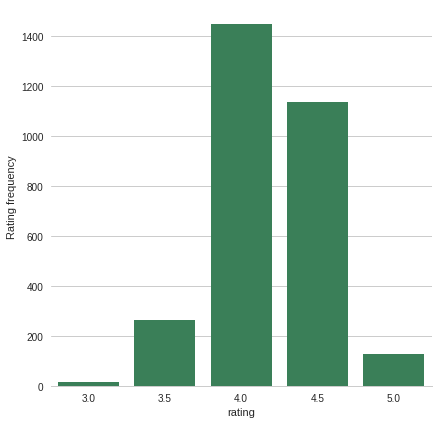

In [25]:
# Draw a nested barplot to show ratings frequencies for each country.
g = sns.factorplot(x="rating", data=yelp, size=6, kind="count", color = 'seagreen')
g.despine(left=True)
g.set_ylabels("Rating frequency")
plt.show()

## Predictors Analysis:

### **Price:**

In [26]:
yelp.city.unique()

array(['London', 'Paris', 'Madrid', 'Rome', 'Dublin', 'Manchester'], dtype=object)

In [27]:
#from matplotlib import cm 

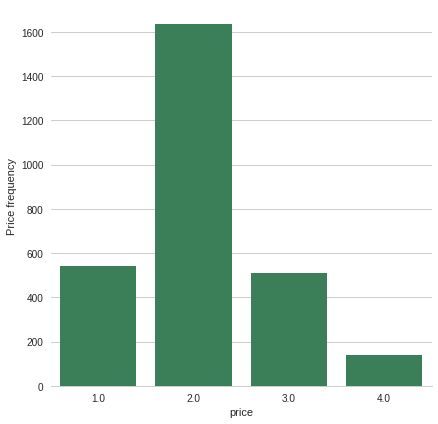

In [28]:
g = sns.factorplot(x="price", data=yelp, size=6, kind="count", color = 'seagreen')
g.despine(left=True)
g.set_ylabels("Price frequency")
plt.show()

In [29]:
yelp['price'].isnull().sum()

169

Price seems to have some null values, we will drop this rows for the moment and model the possible values of the missing prices latter.

In [30]:
yelp_droppricena = yelp.drop(yelp[yelp.price.isnull()].index, axis=0)

In [31]:
yelp['price'].value_counts()

2.0    1633
1.0     541
3.0     508
4.0     141
Name: price, dtype: int64

In [32]:
np.corrcoef(yelp_droppricena['price'],yelp_droppricena['rating'])[0][1]

0.083572782270703541

The correlation seen between price and rating is 8.35%, good restaurants seem to have a higher mean rating, however this correlation is low so that is shows that even low price restaurants can pull out very high reviews.

### **Localization (A - Latitude and Longitude): **


On a first hypothesis we though that localization would be a very good predictor of quality and price of a business.
However when plotting this expectations were not meet. 

City centers seem to be more able to attract higher ratings and have higher prices. We also see some neighbourhoods as Chelsea in London showing clustering behaviours.

This variable will be inputed in the models using the post codes as cluster tool. However in further analysis cluster variables could be engeneered with PCA or k-means models.

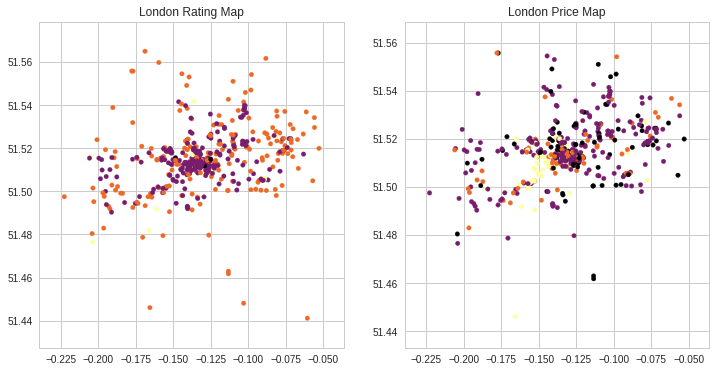

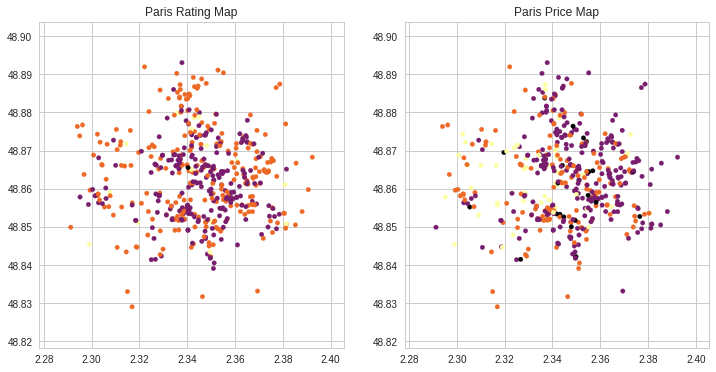

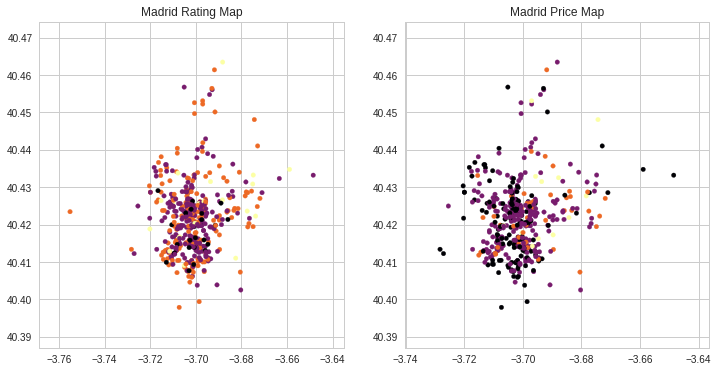

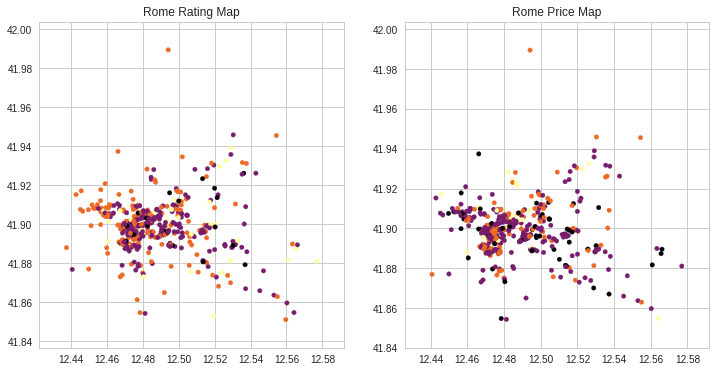

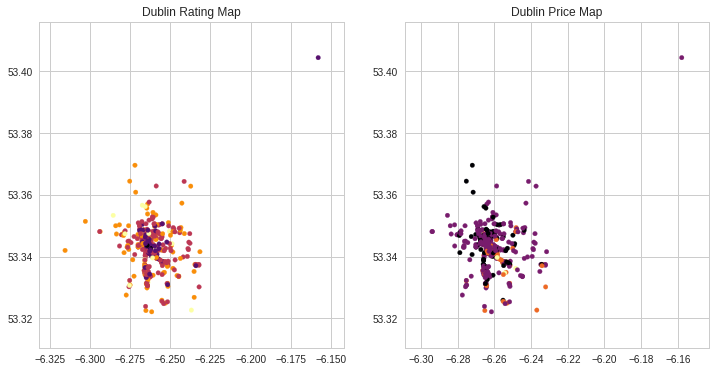

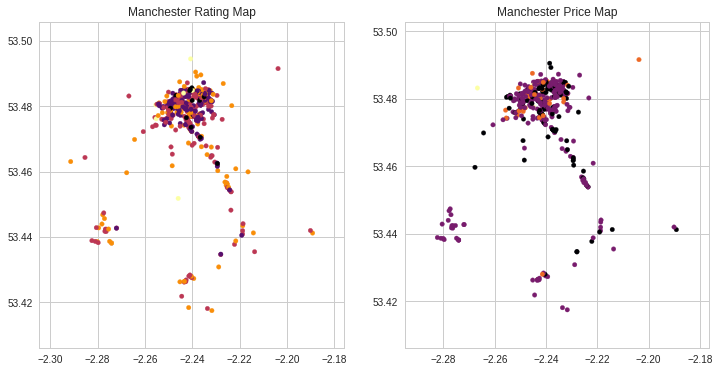

In [33]:
for i in yelp.city.unique():

    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.scatter(yelp[yelp['city']== i]['longitude'],yelp[yelp['city']== i]['latitude'],
                c=yelp[yelp['city']== i]['rating'],cmap = cm.get_cmap('inferno'),s=20)
    plt.title('%s Rating Map' %i)
    plt.grid(True)


    plt.subplot(122)
    plt.scatter(yelp[yelp['city']== i]['longitude'],yelp[yelp['city']== i]['latitude'],
                c=yelp[yelp['city']== i]['price'],cmap = cm.get_cmap('inferno'),s=20)
    plt.title('%s Price Map' %i)
    plt.grid(True)

### **Localization (A - City): **

The analysis uses data from 6 different cities which show clear differentiable behavior in rating wise.

In [34]:
yelp.city.unique()

array(['London', 'Paris', 'Madrid', 'Rome', 'Dublin', 'Manchester'], dtype=object)

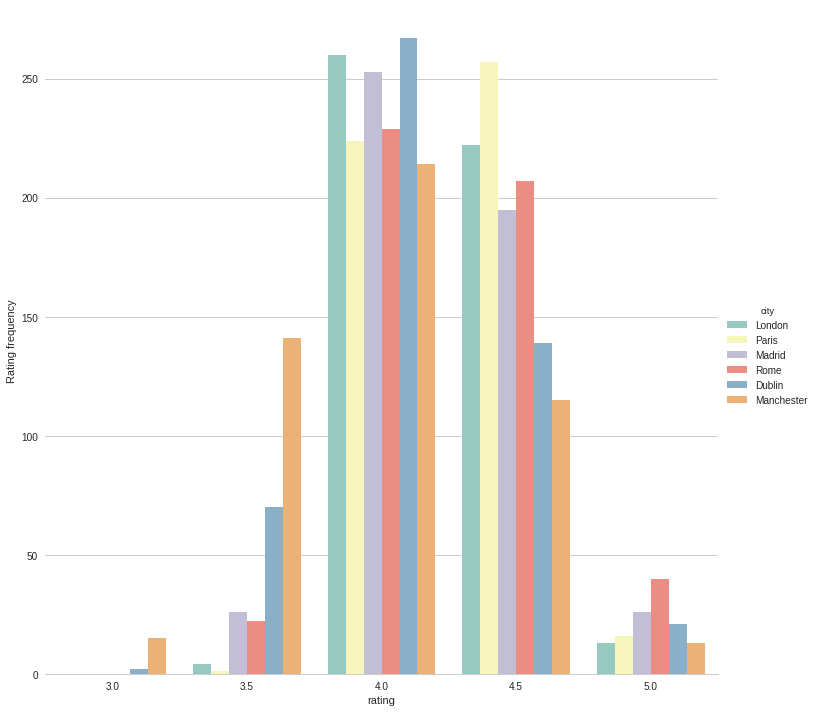

In [35]:
# Draw a nested barplot to show ratings frequencies for each country.
g = sns.factorplot(x="rating", hue="city", data=yelp,
                   size=10, kind="count", palette="Set3")
g.despine(left=True)
g.set_ylabels("Rating frequency")
plt.show()

### **Review Counts**

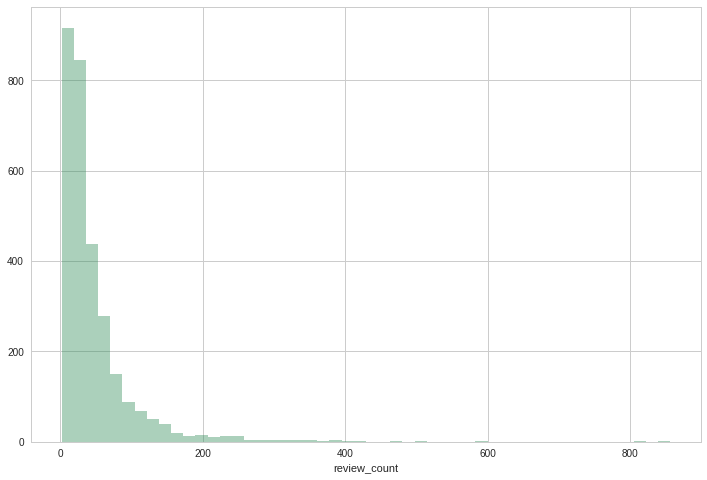

In [36]:
plt.figure(figsize=(12,8))
sns.distplot(yelp.review_count,  color = 'seagreen',kde=False)
plt.show()

The graph shown seems to have an exponential behavior, we will chage the scale to logarithmic to check this up.

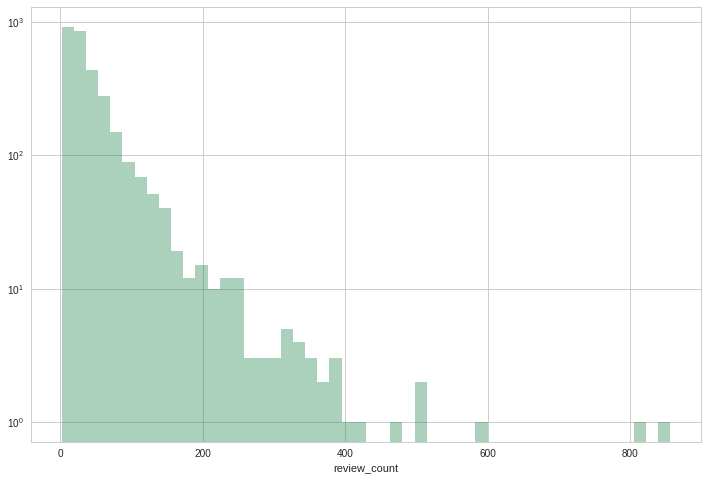

In [37]:
plt.figure(figsize=(12,8))
sns.distplot(yelp.review_count,  color = 'seagreen',kde=False)
plt.yscale('log')
plt.show()

Indeed, the change of scale shows now a linear behavior after the change of scale.

In [38]:
np.corrcoef(yelp_droppricena['review_count'],yelp_droppricena['rating'])[0][1]

-0.17912701640082476

More reviews have a negative effect in the rating observed

### **Phone use:**

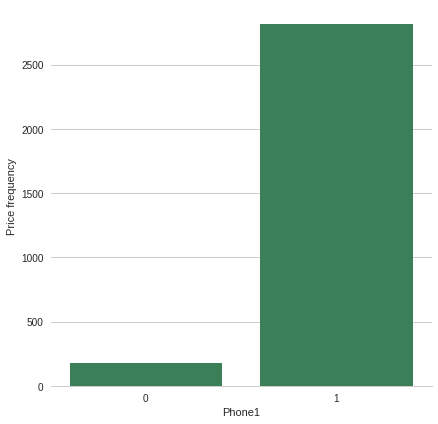

In [39]:
g = sns.factorplot(x="Phone1", data=yelp, size=6, kind="count", color = 'seagreen')
g.despine(left=True)
g.set_ylabels("Price frequency")
plt.show()

### Restaurant category:

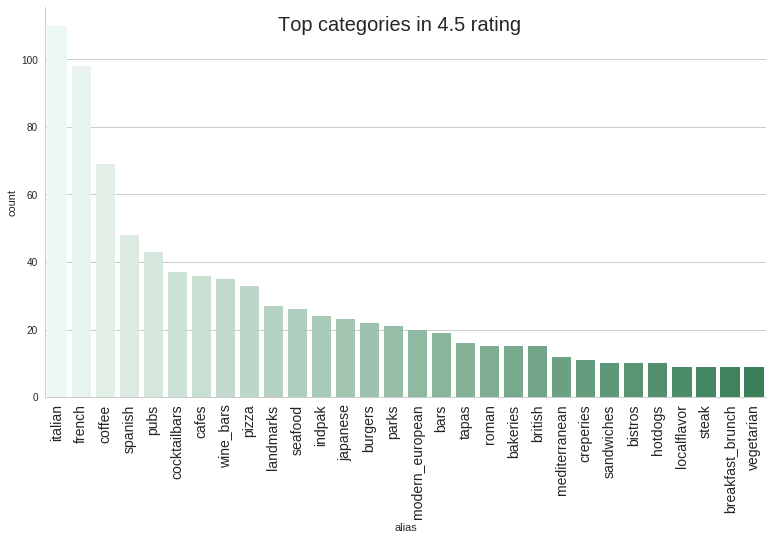

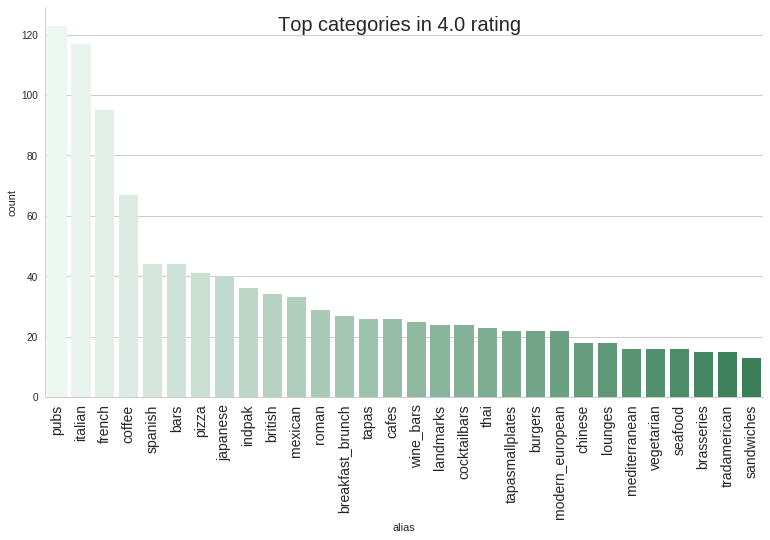

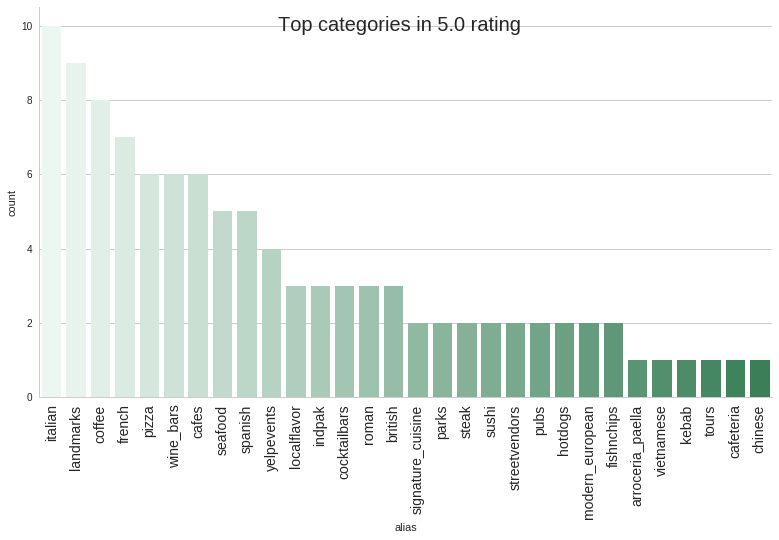

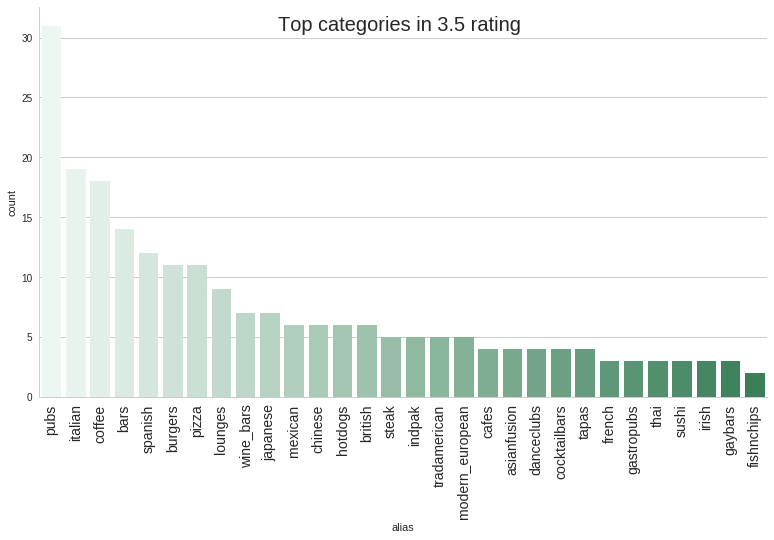

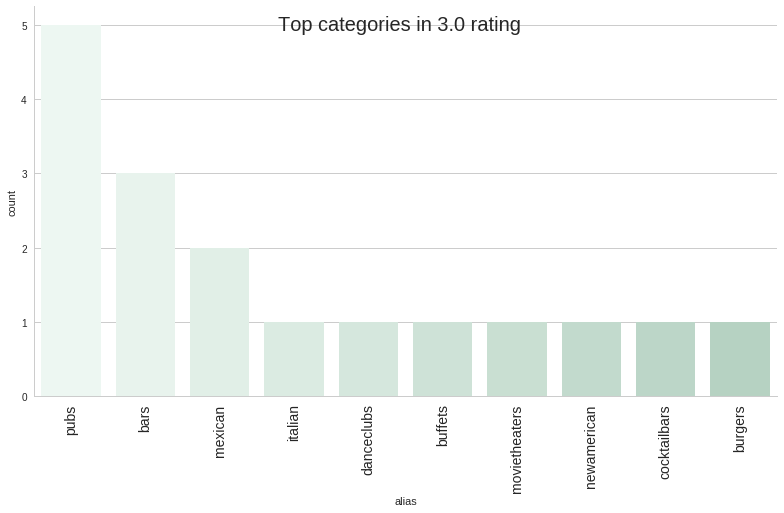

In [40]:
for i in yelp.rating.unique():
    
    yelp_label_filter = yelp[yelp['rating']==i]
    g = sns.factorplot(x="alias", data = yelp_label_filter, kind = "count",
                       palette = sns.light_palette("seagreen", 30), size = 6, aspect = 1.8, 
                       order = yelp_label_filter.alias.value_counts().head(30).index)
    g.set_xticklabels(rotation=90, size= 14)
    plt.subplots_adjust(top=1)
    g.fig.suptitle('Top categories in %s rating' %i,size= 20) ;

There seems to be clear differences in the most common labels of each of the rating categories. 5 stars hotel show for example signature cuisine as one of the most common labels. While 3 rating restaurants on the other hand show different labes like, burgers or pubs.

### **Image information**

**Colors**

*Study of the characteristiccs of the color variables engeeniered in the google API notebook*

In this study we will first look at the predominant colors in the pictures and we will then check the correlation of this characteristics with the rating scale.

Proportion of color in the 40% most common colors of the picture:

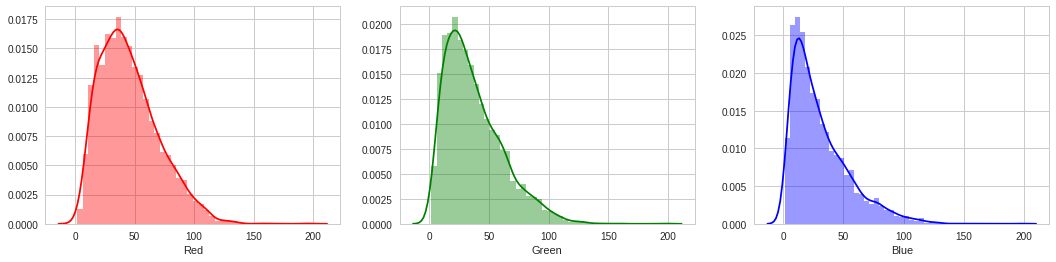

In [41]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.distplot(yelp.Red, color='red');
plt.subplot(132)
sns.distplot(yelp.Green, color='green');
plt.subplot(133)
sns.distplot(yelp.Blue, color='blue');

Red seems to be the predominant color in pictures.

Principal colors in the most common color in the color:

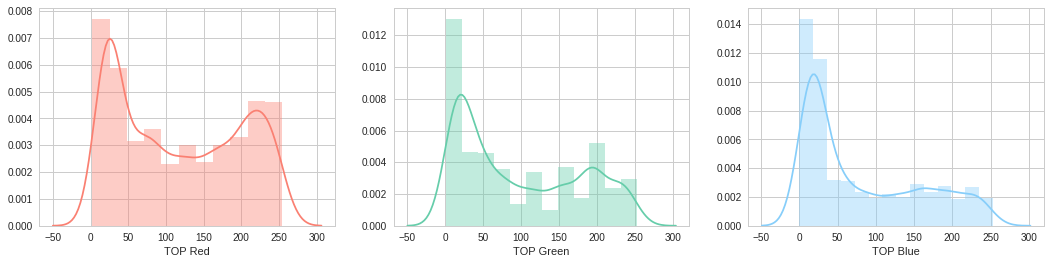

In [42]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.distplot(yelp['TOP Red'], color='salmon');
plt.subplot(132)
sns.distplot(yelp['TOP Green'], color='mediumaquamarine');
plt.subplot(133)
sns.distplot(yelp['TOP Blue'], color='lightskyblue');

Top color in the picture components show a double bell shape given that the most common behavior of colors is that they either don't appear or appear densly.

Proportion of the most dominant color in a picture:

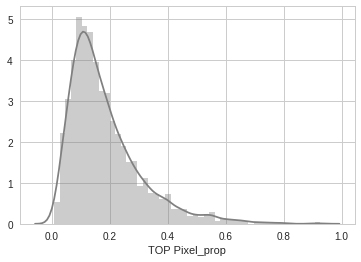

In [43]:
sns.distplot(yelp['TOP Pixel_prop'], color='grey');

**Color - Rating correlation**

In [44]:
corrmat = yelp_droppricena[['rating','Red','Green','Blue','TOP Pixel_prop','TOP Red','TOP Green',
                            'TOP Blue','Image atributes']].corr()

In [45]:
ei = pd.DataFrame(corrmat['rating'].iloc[1:].values,columns=['Rating Correlations'], 
                  index= corrmat['rating'].iloc[1:].index)

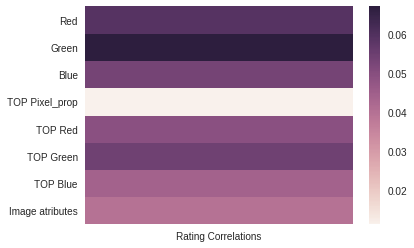

In [46]:
sns.heatmap(ei);

We finally look at the correlation between color components and the rating observed. Although this show very low results we can see that green color has the highest correlation effect. And that the density and saturation of the most common color shows very low correlation.

**Attributes in picture:**

On the last step of the picture analysis we will look at the labels obtained. We have two different approaches in this analysis:

1. Image atributes: Number of labels in the picture.
2. Labels: Dummy variables for each of the labels observed.

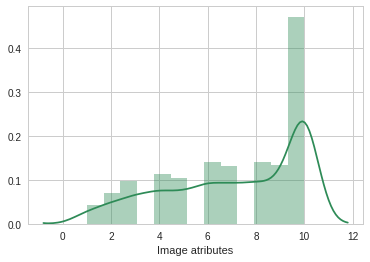

In [47]:
sns.distplot(yelp['Image atributes'], color='seagreen');

In [48]:
##Create the new columns with all of the data from the labels and get it visually

In [49]:
pic_labels = pd.DataFrame()

Creation of dummy variables for each of the labels.

In [50]:
def dummy_label_creator(lalel_list):
    try:
        for i in lalel_list:
            pic_labels[i] = yelp['Labels'].apply(lambda x: 1 if i in x else 0)
    except:
        None

In [51]:
nouse = yelp['Labels'].apply(lambda x: dummy_label_creator(x))

In [52]:
pic_labels.head(2)

,table,drink,lighting,shape,material,drum,dish,food,meal,dinner,...,cart,shopping cart,train station,banchan,metropolis,champagne stemware,pink lady,shoe,sign,2999
0,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
top_labels = pic_labels.sum()[pic_labels.sum().sort_values(ascending= False) > 30].keys()

In [54]:
pic_labels = pic_labels[top_labels]

In [55]:
yelp_with_pic_labels = pd.concat([yelp, pic_labels],axis=1)

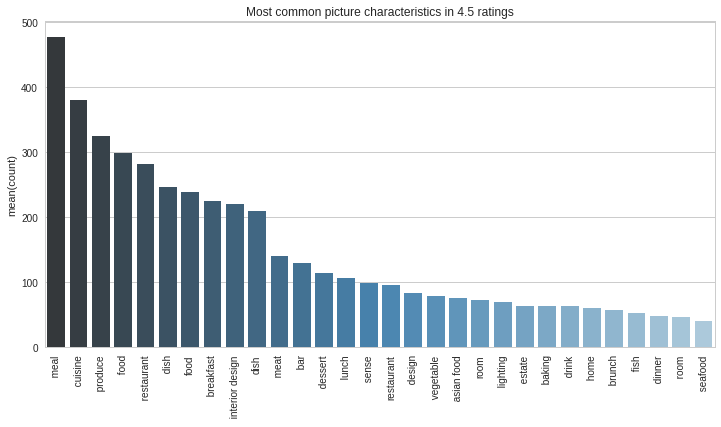

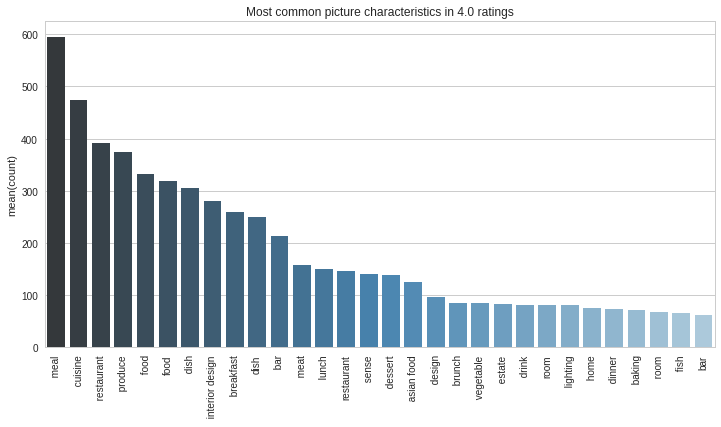

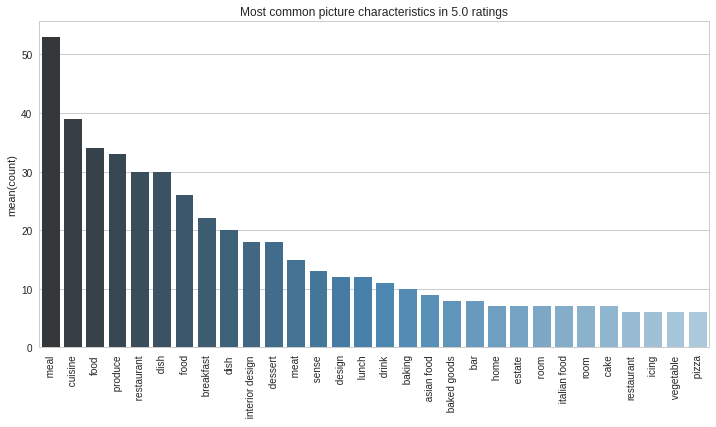

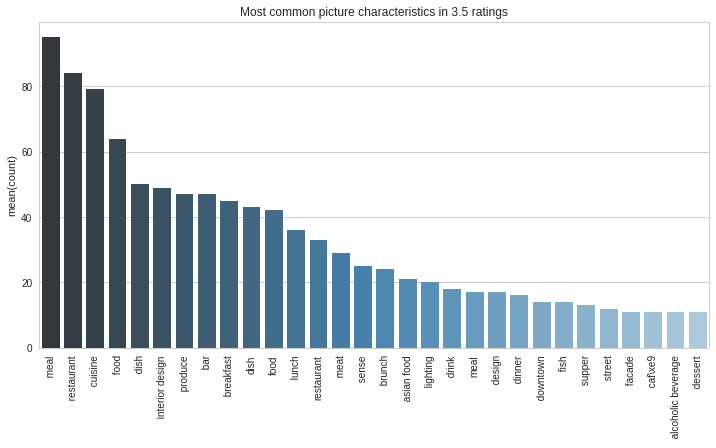

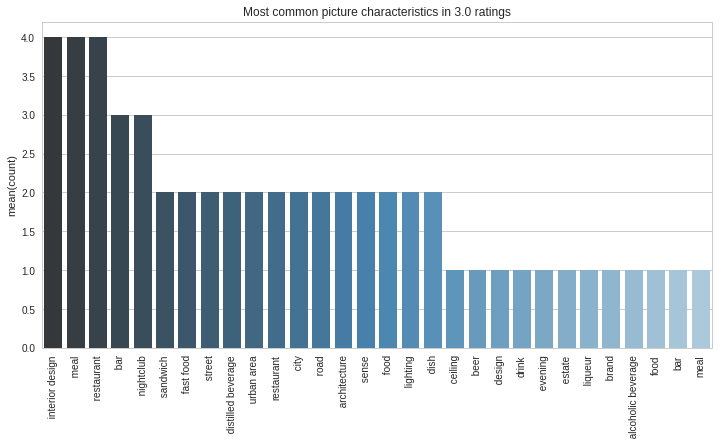

In [56]:
for i in yelp.rating.unique():
    plt.figure(figsize=(12,6))
    pic_labels_filter = yelp_with_pic_labels[yelp_with_pic_labels['rating']==i]
    a = pd.DataFrame(pic_labels_filter.iloc[:,23:].sum().sort_values(ascending=False)[0:30], columns= ['count'])
    g = sns.barplot(x=a.index, y="count", data=a, palette="Blues_d")
    plt.setp(g.get_xticklabels(), rotation=90, size =10)
    plt.title('Most common picture characteristics in %s ratings' %i)
    plt.show()

In contrast with the alias labeling we do not see big differences between the most common labels of each of the categories. However we need to take into account that this are just the 20 most common labels and pictures look very similar in general aspects. Less frequent and more precisse labels could be good predictors of rating anyway.

## 2.3 General Conclusions

1. Price: shows a low positive correlation with rating. Feeding the idea that the higher price restaurants tend to get better reviews however it is possible to get higher results even in the lower price bracket.
2. Location: Different cities show very different rating behaviors. Also clustering based on lat and lon seems to have some potential for future analysis.
3. Number of reviews: Negative correlation with rating.
4. Telephone: Negative correlation with rating.
5. Alias: Alias on restaurants differ depending on the number of stars they have
6. Picture colors: Green has the highest positive correlation with rating. And color density holds no correlation.
7. Picture labels: In contrast with the alias labeling we do not see big differences between the most common labels of each of the categories. However, less frequent and more precise labels could be good predictors of rating anyway.


## 3. Modeling

Next step of the analysis made will be finding the best model predictor for the quality of a restaurant. In order to do this we will follow the next structure of action.

1. Baseline calculation
2. Preprocessing
3. Model Tuning <br>
    A. Logistic Regression <br>
    B. Random Forest<br>
    C. SVM<br>
    D. K - Nearest Neighbors<br> 
    E. PCA (reduction and recalculation of KNN)<br>
4. Evaluation of the results

## 3.1 Baseline calculation

In [57]:
yelp = yelp_with_pic_labels

In [58]:
yelp.dropna(inplace=True)

In [59]:
yelp.shape

(2795, 140)

Before starting with the modeling part we would like to know what is the baseline accuracy of the analysis that we are going to make. As defined before the predicting analisis is going to be segmented in two. On one side we are going to try to classify based on the 4 categorical ratings we know and after we will make the same analysis based on the binary analysis of above 4 stars or below them.

In [60]:
y_cat = yelp.rating

In [61]:
y_cat = y_cat.replace({4.:'4', 4.5:'4.5', 3.5:'3.5', 5.:'5', 3.:'3'})

In [62]:
y_binary = yelp.rating.apply(lambda x: 1 if x > 4 else 0)

In [63]:
print 'Categorical classification baseline:' ,float(sum(yelp['rating'] == 4))/len(yelp['rating'])

Categorical classification baseline: 0.498389982111


The baseline of the categorical problem will be that of the most common variable. In this case 4 stars, which holds 49.83% of the observations. However this segmentation holds a huge class imbalance that makes predictions completely inaccurate. In order to simplify this problem and make a more feasible estimator we will use the binary problem between having ratings over 4 or under 4.

In [64]:
binary_baseline = 1 - y_binary.mean()

In [65]:
print 'Binary classification baseline:', 1 - y_binary.mean()

Binary classification baseline: 0.596779964222


In the case of the binary classification problem less than 4 stars is the most common feature and therefore the baseline, representing 59.67% of the observation.

In [66]:
y_binary.value_counts()

0    1668
1    1127
Name: rating, dtype: int64

## 3.2 Preprocesing

**Prediction matrix creation**

We first made a frame with the main attributes of the of the frame

In [67]:
yelp.columns[5:30]

Index([u'city', u'country', u'state', u'address1', u'zip_code', u'latitude',
       u'longitude', u'image_url', u'rating', u'Labels', u'Red', u'Green',
       u'Blue', u'TOP Pixel_prop', u'TOP Red', u'TOP Green', u'TOP Blue',
       u'Image atributes', u' drink', u' lighting', u' shape', u'dish',
       u' food', u' meal', u' dinner'],
      dtype='object')

In [68]:
X = yelp.drop(['name','alias', 'city','country', 'state', 'address1', 
               'zip_code','latitude','longitude', 'image_url', 
               'rating', 'Labels'], axis = 1)

In [69]:
X.head()

,price,review_count,Phone1,Red,Green,Blue,TOP Pixel_prop,TOP Red,TOP Green,TOP Blue,...,cottage,light,glass,wine,real estate,property,ancient history,spaghetti,chocolate,brand
0,3.0,44,1,35.637404,30.237467,26.485564,0.291338,66.0,60.0,58.0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,228,1,58.731070,42.526067,24.079588,0.203647,146.0,114.0,68.0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,103,1,102.410143,97.766594,89.259882,0.305369,200.0,190.0,168.0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,149,1,72.372364,64.682527,57.897892,0.276127,225.0,204.0,180.0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,153,1,25.271032,24.552253,25.396572,0.262404,83.0,81.0,82.0,...,0,0,0,0,0,0,0,0,0,0


Next step is engineering prediction variables based on the dummy variables obtained by the alias and the city attribute.

In [70]:
dummies = pd.get_dummies(yelp.alias, drop_first=True)#get alias dummies

dummies2 = pd.get_dummies(yelp['city'], drop_first=True)#get city dummies

dummies = pd.concat([dummies2,dummies], axis=1)#join all dummies

print X.shape
print dummies.shape
print dummies2.shape

(2795, 128)
(2795, 177)
(2795, 5)


In [71]:
X = pd.concat([X,dummies], axis=1)#join dummies to general frame

**Train test segmentation.** As a last step we split the working matrices between train and test. with the diffirenciation of the binary and the categorical problem. 

In the final tuning we will only use the binary train class.

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_cat_train, y_cat_test, y_binary_train, y_binary_test = train_test_split(X, y_cat, y_binary, test_size=0.1, random_state=20)

## 3.3 Model Tuning

With the target and predictors ready the next step will be tuning the model and comparing it with our bechmark the baseline

In [73]:
results = pd.DataFrame(['Binary baseline', 'A. Logistic Regresion', 'B. Random Forest' 
                        , 'C. SVM','D. K nearest neightbors'], columns=['Predictor'])

In [74]:
results['score']=0

In [75]:
results.ix[0,'score']= binary_baseline

In [76]:
results

,Predictor,score
0,Binary baseline,0.59678
1,A. Logistic Regresion,0.00000
2,B. Random Forest,0.00000
3,C. SVM,0.00000
4,D. K nearest neightbors,0.00000


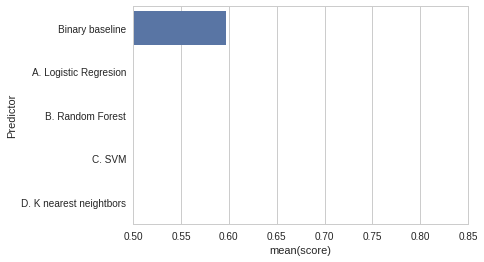

In [77]:
sns.barplot(x = 'score', y='Predictor', data=results);
plt.xlim(0.5, 0.85);

## A) Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import pprint
import itertools

First model we try is a Logistic Regression, as  with the rest of the models we will tune it's main parameters using gridsearch and comparing the different results.

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y_binary, test_size=0.13, stratify=y_binary, random_state=77)
logreg_cv1 = LogisticRegressionCV(Cs=15, cv=5, random_state=5, penalty ='l1', solver='liblinear')
logreg_cv1.fit(X_train, Y_train)
# Return the considered penalty strengths
print logreg_cv1.Cs_

best_C = logreg_cv1.C_
best_C = float(best_C)

print "\nBest C:", best_C

[  1.00000000e-04   3.72759372e-04   1.38949549e-03   5.17947468e-03
   1.93069773e-02   7.19685673e-02   2.68269580e-01   1.00000000e+00
   3.72759372e+00   1.38949549e+01   5.17947468e+01   1.93069773e+02
   7.19685673e+02   2.68269580e+03   1.00000000e+04]

Best C: 0.0719685673001


In [80]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True Rating')
    plt.xlabel('Predicted Rating')
    plt.show()

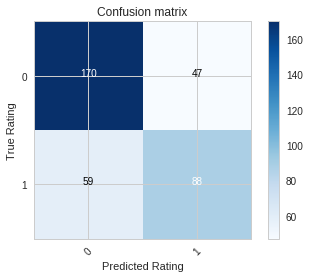

In [81]:
model3 = LogisticRegression(C=best_C)
model3.fit(X_train, Y_train)
predictions3 = model3.predict(X_test)
cnf_matrix3 = confusion_matrix(Y_test, predictions3)
plot_confusion_matrix(cnf_matrix3, classes=model3.classes_)

In [82]:
log_rec_score = model3.score(X_test, Y_test)
print "Best Logistic Regression accuracy:", model3.score(X_test, Y_test)

Best Logistic Regression accuracy: 0.708791208791


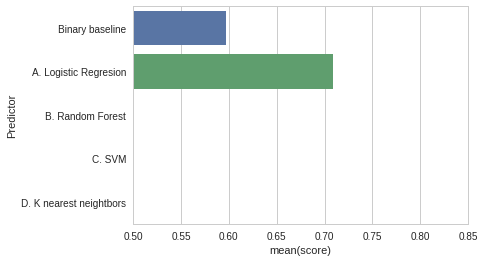

In [83]:
results.ix[1,'score']= log_rec_score
sns.barplot(x = 'score', y='Predictor', data=results);
plt.xlim(0.5, 0.85);

## B) Random Forest

The second model we will use is Random Forest. Like in the case of  Logistic Regresion, the results are optimized using Gridsearch.  Notice that the parameters used in the gridsearch are in a very limited space given that in the optimization problem the gridsearch was run many times leaving at the end the parameters with the greatest potential.

In [85]:
from sklearn.ensemble import RandomForestClassifier 

In [86]:
X_train, X_test, y_binary_train, y_binary_test, y_cat_train, y_cat_test = train_test_split(X, y_binary, y_cat, test_size=0.13, stratify=y_binary, random_state=77)

In [87]:
params = {'n_estimators':[10, 50, 100, 150, 200],#number of trees
          'max_features': ['sqrt', 80],#rule of thumb: sqrt of total features in X
          'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],#decision level depth 
          #'min_samples_leaf': np.linspace(0.0001, 0.02, 10)#min number of samples on final (decision) nodes - leaves.
         }

rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, params, cv=7)#7 fold cross validation on search space, avoiding overfitting
rf_grid.fit(X_train, y_binary_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 150, 200], 'max_features': ['sqrt', 80], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [88]:
RF_Score = rf_grid.best_score_
print 'Best Random Forests Score: ' + str(rf_grid.best_score_)

Best Random Forests Score: 0.736322501028


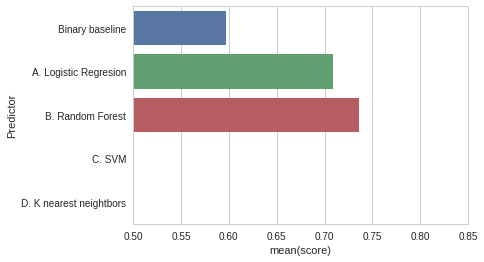

In [89]:
results.ix[2,'score']= RF_Score
sns.barplot(x = 'score', y='Predictor', data=results);
plt.xlim(0.5, 0.85);

In [90]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 80, 'n_estimators': 100}

In [91]:
pd.DataFrame({
            'feature':X_train.columns,
            'importance':rf_grid.best_estimator_.feature_importances_}).head(10)

,feature,importance
0,price,0.039170
1,review_count,0.317160
2,Phone1,0.002126
3,Red,0.038154
4,Green,0.031831
5,Blue,0.030810
6,TOP Pixel_prop,0.034583
7,TOP Red,0.028877
8,TOP Green,0.031180
9,TOP Blue,0.030416


## C) SVM

On this next step we will tune in a Support Vector Machine model. Like before we will tune the model using gridsearch for the different parameters.

In [92]:
from sklearn import svm 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [156]:
rbf_model = SVC(kernel='linear',probability=True)
rbf_model.fit(X_train, y_binary_train)
scores = cross_val_score(rbf_model, X_train, y_binary_train, cv=5) 
sm = scores.mean()

In [94]:
# from sklearn.svm import SVC

# svc_params = {
#     'C':np.logspace(-3, 2, 3),
#     'gamma':np.logspace(-5, 2, 3),
#     'kernel':['linear','rbf']
# }

# svc_gs = GridSearchCV(SVC(), svc_params, cv=2, verbose=1)
# svc_gs.fit(X_train, y_binary_train)

In [153]:
Best_SVM_score = sm
print 'SVM score:', sm

SVM score: 0.691485622058


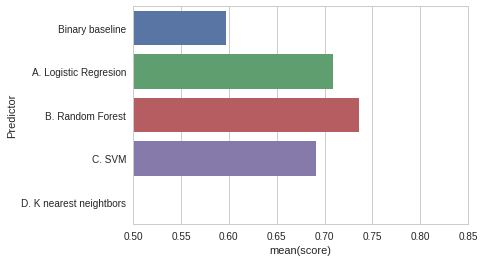

In [97]:
results.ix[3,'score']= Best_SVM_score
sns.barplot(x = 'score', y='Predictor', data=results);
plt.xlim(0.5, 0.85);

## D) K-Nearest Neighbors

Lastly we will perform the K-Nearest Neighbors

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
params = {'n_neighbors':range(25,36),#number of neighbor observations to consider when assigning new labels
         'p':[1,2]}#manhattan or euclidean distance between observations  

knn_model = KNeighborsClassifier(n_jobs=4)#using all cores 
knn_grid = GridSearchCV(knn_model, params, cv=7)#7 fold cross validation 
knn_grid.fit(X_train, y_binary_train)#fit model

GridSearchCV(cv=7, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [100]:
knn_grid.best_params_

{'n_neighbors': 28, 'p': 2}

In [101]:
best_knn_score = knn_grid.best_score_

In [102]:
print 'Best KNN score: ' + str(knn_grid.best_score_)

Best KNN score: 0.626902509255


In [103]:
best_knn_score

0.62690250925545044

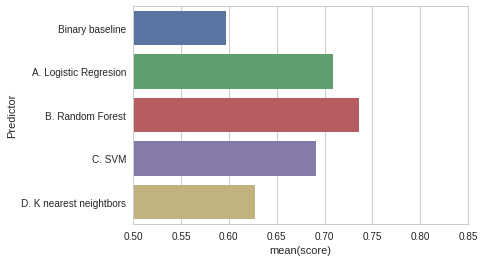

In [104]:
results.ix[4,'score']= best_knn_score
sns.barplot(x = 'score', y='Predictor', data=results);
plt.xlim(0.5, 0.85);

The sesults obtained are very dissapointing. KNN models don't work as well with high dimensional data. For this reason the score of the modeling fit is barely over the baseline. In order to solve this problem we will use Principal Component Analisis to reduce the dimensionality of the data and fit the models again.

## E) Principal Component Analysis

In [105]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

First step before applying PCA would be scaling the data:

In [106]:
ss = StandardScaler()#Centering ((x-mean)/std) values for each column for PCA. 
Features = ss.fit_transform(X_train)#fit and transform normalisation 
Features = pd.DataFrame(Features, columns=X_train.columns)#transform to df
Features.head(3)

,price,review_count,Phone1,Red,Green,Blue,TOP Pixel_prop,TOP Red,TOP Green,TOP Blue,...,turkish,tuscan,vegan,vegetarian,venues,vietnamese,vintage,whiskeybars,wine_bars,wok
0,-0.126575,1.050183,0.189183,-0.977450,-0.798753,-0.591570,1.193385,-0.758514,-0.630795,-0.491273,...,-0.05746,-0.020286,-0.05746,-0.093347,-0.020286,-0.076107,-0.020286,-0.020286,-0.165748,-0.020286
1,2.549106,-0.656634,0.189183,0.423930,0.008202,0.053198,-0.426589,0.494060,0.144541,0.159390,...,-0.05746,-0.020286,-0.05746,-0.093347,-0.020286,-0.076107,-0.020286,-0.020286,-0.165748,-0.020286
2,-0.126575,-0.638281,0.189183,1.730639,1.888579,1.818892,1.027589,1.169467,1.301190,1.288091,...,-0.05746,-0.020286,-0.05746,-0.093347,-0.020286,-0.076107,-0.020286,-0.020286,-0.165748,-0.020286


In [107]:
knn_pca = PCA(n_components=300) #use all columns
knn_pca = knn_pca.fit(Features.values)#fit PCA
knn_Principal_Components = knn_pca.fit_transform(Features.values)

In [108]:
def plot_cumsum_variance(var_ratio):
    fig = plt.figure(figsize=(10,5))#init figure 
    ax = fig.gca()
    
    x_vals = range(1,len(var_ratio)+1)#set x&y values
    y_vals = var_ratio
    
    ax.set_title('Explained Variance over Principal Components')#set title and labels 
    ax.set_ylabel('Cumulative Sum of Variance Explained')
    ax.set_xlabel('Number of Principal Components')
    
    ax.plot(x_vals, y_vals)

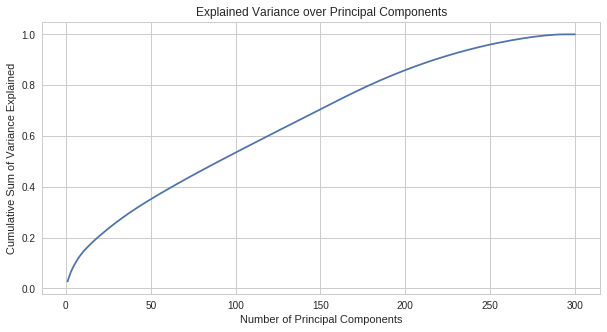

In [109]:
var_ratio = knn_pca.explained_variance_ratio_
var_ratio = np.cumsum(var_ratio)#obtain cumulative sum for variance ratios 
plot_cumsum_variance(var_ratio)#plot results

In [110]:
print str(round(var_ratio[200],2)) + ' of variance in data is explained by the top 20 Principal Components'

0.86 of variance in data is explained by the top 20 Principal Components


In [111]:
print str(round(var_ratio[225],2)) + ' of variance in data is explained by the top 20 Principal Components'

0.92 of variance in data is explained by the top 20 Principal Components


We see a very steady increase on the explanation of the variance by the different principal components added. However we do see at the first 30 variables added a faster increase of the explanation of variance. Given this we will try to fit knn with the top 30 variables.

In [112]:
pc_features = knn_pca.transform(Features.values)#projection to pcs
pd.DataFrame(pc_features).shape#projected shape

(2431, 300)

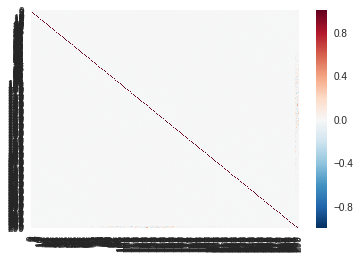

In [113]:
sns.heatmap(np.corrcoef(pc_features.T))#correlation heatmap of Principal Components 
plt.show()

As expected the correlation between the different PC is non existant

In [114]:
# knn_features = pd.DataFrame(pc_features)

In [115]:
# knn_pca = PCA(n_components=29) #init and fit and transform with new feature space
# knn_fpcs = knn_pca.fit_transform(knn_features.values)
# sns.heatmap(np.corrcoef(knn_fpcs.T))#plot correlation heatmap 
# plt.show()

In [116]:
pcs = pd.DataFrame(pc_features, columns=['PC'+str(i) for i in range(1,len(pc_features[0])+1)])#convert to df
pcs.head(3)#check results

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC291,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300
0,2.406135,-1.292318,-1.888601,1.138837,1.414245,0.446907,-0.440532,0.139436,-0.201189,-0.366945,...,-0.187835,-0.349802,0.028131,0.014581,0.014470,0.003635,1.410865e-16,2.682956e-16,-3.996875e-18,-4.166642e-17
1,2.277826,-1.339095,2.542328,-1.152214,-1.279616,0.343564,-0.171075,0.897856,4.430847,-1.563071,...,0.124338,0.099167,0.002196,0.233174,0.037277,-0.000012,-8.051125e-16,1.542649e-15,-2.368315e-16,-7.175087e-16
2,3.416391,10.906700,2.033770,-0.701575,1.593339,-0.305705,0.897941,-0.216108,-1.957226,0.549843,...,0.031043,0.104738,-0.083032,-0.045360,-0.017345,0.001082,1.269961e-15,-3.501838e-16,1.090236e-15,1.487065e-15


In [117]:
pcs = pcs.ix[:,:'PC30']#only keep top 15 Princpical Components 
print pcs.shape

(2431, 30)


In [118]:
params = {'n_neighbors':range(25,36),#number of neigbors (refined over multiple runs)
         'p':[1,2]}#manhattan or euclidean distance

knn_model = KNeighborsClassifier(n_jobs=4)#using all cores
knn_pca_grid = GridSearchCV(knn_model, params, cv=7)#7 fold cross validation
knn_pca_grid.fit(pcs, y_binary_train)#fit model

GridSearchCV(cv=7, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [119]:
knn_pca_grid.best_params_

{'n_neighbors': 35, 'p': 1}

In [120]:
print 'knn after pca accuracy: ' + str(knn_pca_grid.best_score_)

knn after pca accuracy: 0.596462361168


Unexpectetly the results of KNN with PCA leaves a lower result than the initial analysis. 30 PCA probably are unable to absorb as much variance as it was needed.

Further analysis will try to tune PCA in the trade-off of variance explanation and number of features used for prediction.

# 4. Evaluation of results 

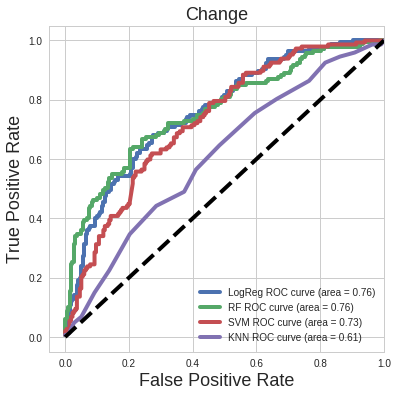

In [160]:
prediction_logrec = model3.predict_proba(X_test) [:,1]
prediction_RF = rf_grid.best_estimator_.predict_proba(X_test) [:,1]
prediction_SVM = rbf_model.predict_proba(X_test) [:,1]
prediction_KNN = knn_grid.best_estimator_.predict_proba(X_test) [:,1]
 
from sklearn.metrics import roc_curve, auc 
 
# For class 1, find the area under the curve 
fpr1, tpr1, _ = roc_curve(Y_test, prediction_logrec) 
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(Y_test, prediction_RF) 
roc_auc2 = auc(fpr2, tpr2) 

fpr3, tpr3, _ = roc_curve(Y_test, prediction_SVM) 
roc_auc3 = auc(fpr3, tpr3) 

fpr4, tpr4, _ = roc_curve(Y_test, prediction_KNN) 
roc_auc4 = auc(fpr4, tpr4) 
  
# Plot of a ROC curve for class 1 (has_cancer) 
plt.figure(figsize=[6,6]) 
plt.plot(fpr, tpr, label='LogReg ROC curve (area = %0.2f)' % roc_auc1, linewidth=4)
plt.plot(fpr2, tpr2, label='RF ROC curve (area = %0.2f)' % roc_auc2, linewidth=4)
plt.plot(fpr3, tpr3, label='SVM ROC curve (area = %0.2f)' % roc_auc3, linewidth=4)
plt.plot(fpr4, tpr4, label='KNN ROC curve (area = %0.2f)' % roc_auc4, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4) 
plt.xlim([-0.05, 1.0]) 
plt.ylim([-0.05, 1.05]) 
plt.xlabel('False Positive Rate', fontsize=18) 
plt.ylabel('True Positive Rate', fontsize=18) 
plt.title('Change', fontsize=18) 
plt.legend(loc="lower right") 
plt.show() 

The roc curve results support the insight provided by the scores in the modeling part. Random Forest seems to be the best predictor of business quality.

In [165]:
prediction_logrec = model3.predict_proba(X_test) [:,1]
prediction_RF = rf_grid.best_estimator_.predict_proba(X_test) [:,1]
prediction_SVM = rbf_model.predict_proba(X_test) [:,1]
prediction_KNN = knn_grid.best_estimator_.predict_proba(X_test) [:,1]

In [167]:
print 'Logistic Regression'
print classification_report(Y_test, model3.predict(X_test))
print 'Random Forests'
print classification_report(Y_test, rf_grid.best_estimator_.predict(X_test))
print 'SVC'
print classification_report(Y_test, rbf_model.predict(X_test))
print 'K-Nearest Neighbors'
print classification_report(Y_test, knn_grid.best_estimator_.predict(X_test))

Logistic Regression
             precision    recall  f1-score   support

          0       0.74      0.78      0.76       217
          1       0.65      0.60      0.62       147

avg / total       0.71      0.71      0.71       364

Random Forests
             precision    recall  f1-score   support

          0       0.73      0.86      0.79       217
          1       0.72      0.54      0.61       147

avg / total       0.73      0.73      0.72       364

SVC
             precision    recall  f1-score   support

          0       0.73      0.75      0.74       217
          1       0.61      0.59      0.60       147

avg / total       0.68      0.68      0.68       364

K-Nearest Neighbors
             precision    recall  f1-score   support

          0       0.64      0.80      0.71       217
          1       0.54      0.35      0.42       147

avg / total       0.60      0.62      0.59       364



The different models show different balances between the different evaluation methods. 

We choose accuracy score is the best indicator of the final quality of the model, as we saw, random forest shows the best performance in this parameter, however RF also shows the best result in recall and F1-score, leaving it as the leader in all metrics.

With this we have develop a model for the prediction ratings of restaurants based on online advertisement. As it was pointed out before the depth of this analysis is unable to show causality, at least in the yelp particular case. Nevertheless the insight and methodology provided in this analysis could be useful in other enviroments where this insight would be useful for understanding buyers behavior (Deliveroo, Uber eat or open table).

In terms of next steps two main drivers of action could be taken for deepening the analysis:
1. Enhance of the predictor variables.<br>
    a. Filling of null values with prediction models<br>
    b. NLP analysis of coment and description text<br>
    c. Clustering of location (lon, lat)<br>
    d. Define function for cleaning structuring in one step<br>
2. Deepening of the modeling<br>
    a. Reproduction of the modeling with the categorical variables<br>
    b. Plot of the learning curves of the different models<br>
    c. Tune of PCA for knn<br>
    d. Pipeline modeling